In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
from keras import layers
from keras.models import Sequential

In [32]:
import pathlib

data_dir = pathlib.Path('../src/disease_dataset')

In [34]:
data_dir

WindowsPath('../src/disease_dataset')

In [35]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('../src/disease_dataset/Acne/Acne (1).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (10).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (100).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (101).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (102).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (103).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (104).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (105).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (106).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (107).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (108).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (109).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (11).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (110).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (111).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (112).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Ac

In [33]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2982


In [36]:
len(list(data_dir.glob('*/*.jpg')))

2982

In [39]:
Moneypox=list(data_dir.glob('Moneypox/*'))
Moneypox[:5]

[WindowsPath('../src/disease_dataset/Moneypox/Moneypox_1.jpg'),
 WindowsPath('../src/disease_dataset/Moneypox/Moneypox_10.jpg'),
 WindowsPath('../src/disease_dataset/Moneypox/Moneypox_1009.jpg'),
 WindowsPath('../src/disease_dataset/Moneypox/Moneypox_1010.jpg'),
 WindowsPath('../src/disease_dataset/Moneypox/Moneypox_1011.jpg')]

In [67]:
Acne=list(data_dir.glob('Acne/*'))
Acne[:2]

[WindowsPath('../src/disease_dataset/Acne/Acne (1).jfif'),
 WindowsPath('../src/disease_dataset/Acne/Acne (1).jpg')]

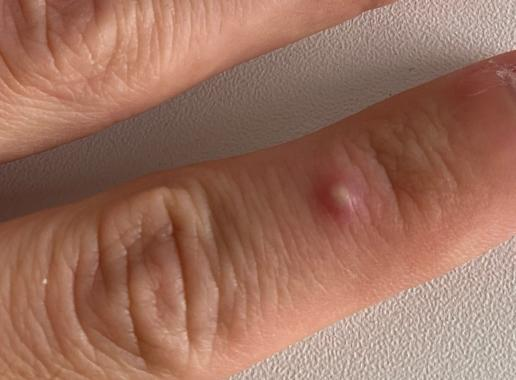

In [40]:
PIL.Image.open(str(Moneypox[0]))

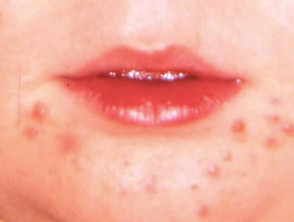

In [41]:
Acne=list(data_dir.glob('Acne/*'))
PIL.Image.open(str(Acne[0]))

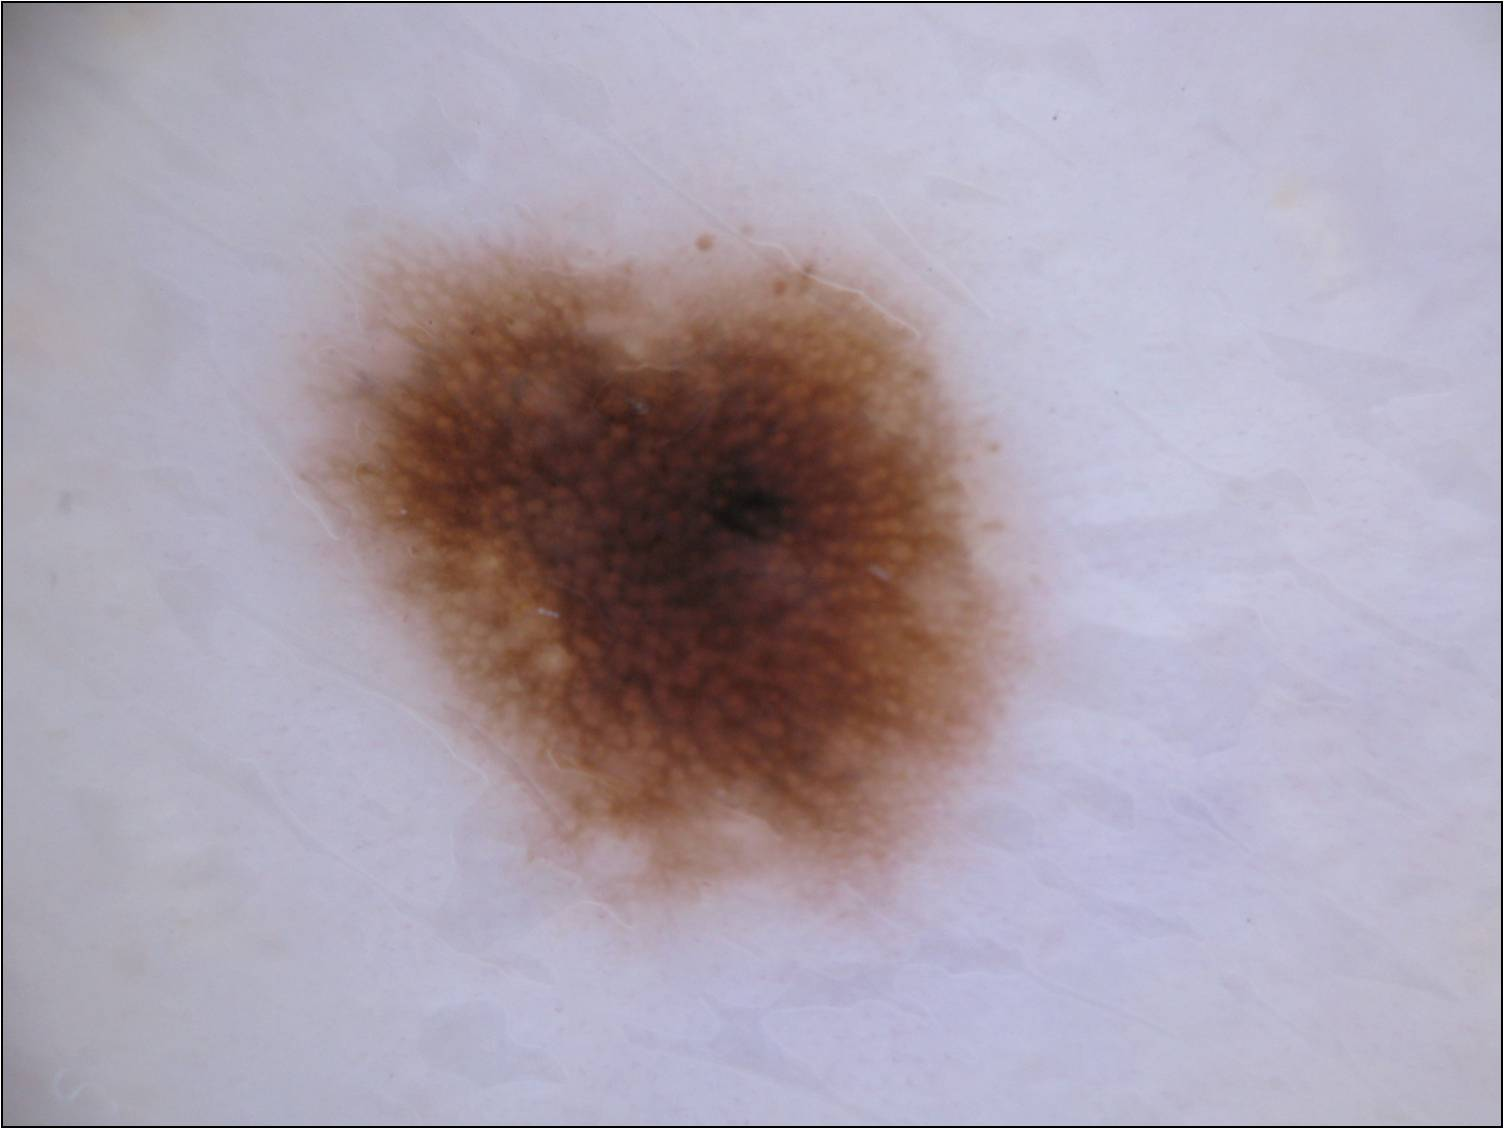

In [42]:
Melanoma=list(data_dir.glob('Melanoma/*'))
PIL.Image.open(str(Melanoma[0]))

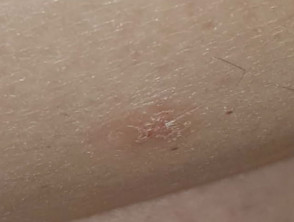

In [47]:
Cyst=list(data_dir.glob('Cyst, tumour and skin-tags/*'))
PIL.Image.open(str(Cyst[0]))

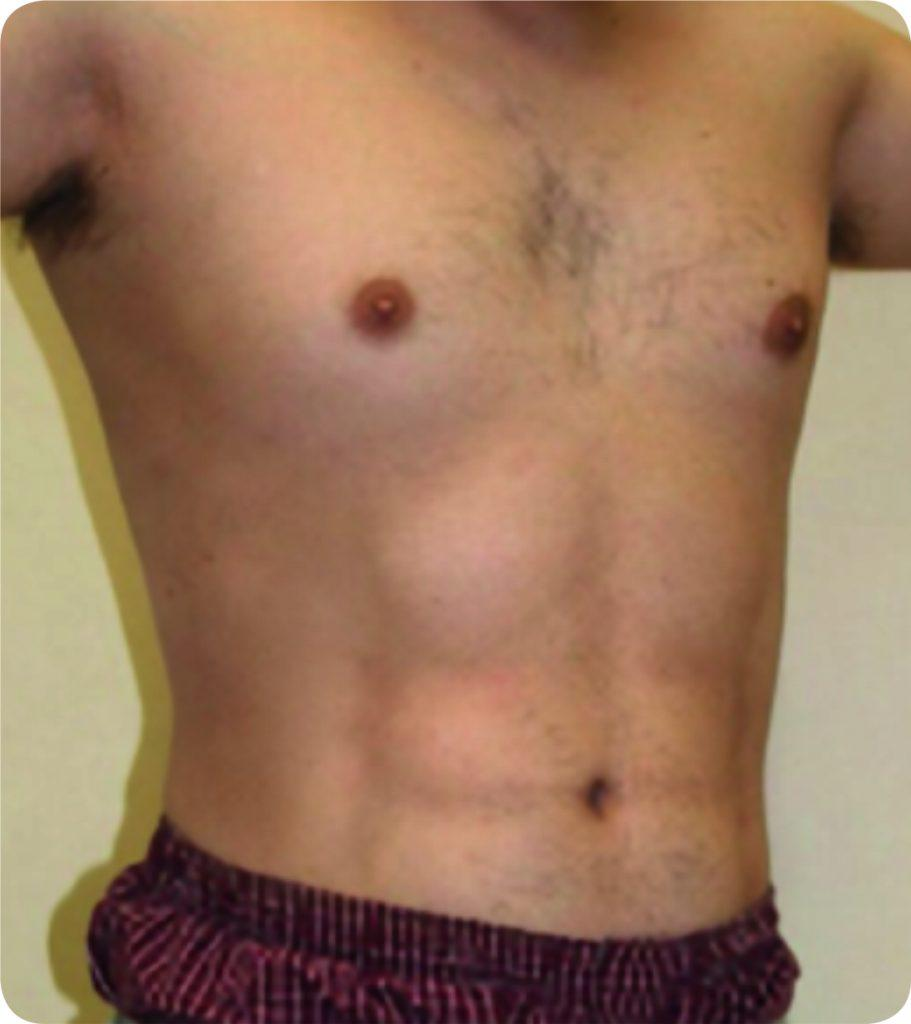

In [48]:
Normal=list(data_dir.glob('Normal skin/*'))
PIL.Image.open(str(Normal[0]))

In [81]:
disease_dataset_dict = {
    'Acne': list(data_dir.glob('Acne/*')),
    'Cyst': list(data_dir.glob('Cyst, tumour and skin-tags/*')),
    'Melanoma': list(data_dir.glob('Melanoma/*')),
    'Moneypox': list(data_dir.glob('Moneypox/*')),
    'Normal': list(data_dir.glob('Normal skin/*')),
}

In [82]:
disease_labels_dict={
    'Acne':0,
    'Cyst':1,
    'Melanoma':2,
    'Moneypox':3,
    'Normal':4,
}

In [83]:
disease_dataset_dict['Acne'][:5]

[WindowsPath('../src/disease_dataset/Acne/Acne (1).jfif'),
 WindowsPath('../src/disease_dataset/Acne/Acne (1).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (10).jfif'),
 WindowsPath('../src/disease_dataset/Acne/Acne (10).jpg'),
 WindowsPath('../src/disease_dataset/Acne/Acne (100).jpg')]

In [84]:
str(disease_dataset_dict['Acne'][0])

'..\\src\\disease_dataset\\Acne\\Acne (1).jfif'

In [85]:
img = cv2.imread(str(disease_dataset_dict['Acne'][0]))
img

array([[[191, 198, 253],
        [189, 199, 253],
        [186, 200, 252],
        ...,
        [234, 232, 254],
        [232, 230, 252],
        [232, 228, 253]],

       [[188, 198, 252],
        [188, 198, 252],
        [185, 199, 251],
        ...,
        [231, 232, 253],
        [231, 228, 253],
        [231, 227, 252]],

       [[188, 198, 252],
        [186, 199, 251],
        [186, 200, 252],
        ...,
        [230, 230, 254],
        [230, 227, 252],
        [229, 226, 252]],

       ...,

       [[ 84, 128, 223],
        [ 84, 122, 218],
        [ 84, 116, 213],
        ...,
        [146, 169, 247],
        [146, 169, 247],
        [145, 168, 246]],

       [[ 91, 139, 234],
        [ 92, 134, 230],
        [ 94, 129, 226],
        ...,
        [145, 168, 246],
        [144, 167, 245],
        [143, 166, 246]],

       [[ 96, 147, 241],
        [100, 144, 239],
        [103, 138, 235],
        ...,
        [144, 167, 245],
        [143, 166, 246],
        [142, 165, 245]]

In [86]:
img.shape

(222, 294, 3)

In [87]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [88]:
X, y = [], []

for disease_name, images in disease_dataset_dict.items():
    print(disease_name)
    print(len(images))

Acne
400
Cyst
600
Melanoma
600
Moneypox
700
Normal
700


In [89]:
X, y = [], []

for disease_name, images in disease_dataset_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(disease_labels_dict[disease_name])

In [90]:
X = np.array(X)
y = np.array(y)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [93]:
len(X_train)

2250

In [95]:
len(y_test)

750

In [96]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255